In [1]:
import numpy as np
from tensorflow import keras
from keras import models 
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dense(10, activation='softmax')) 
net.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

# preprocessing
X_train = X_train.reshape((60000, 28*28))
X_train = X_train/255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test/255

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________


In [6]:
net.fit(X_train, y_train, epochs=1, batch_size=128)

469/469 [==============================] - 12s 26ms/step - loss: 0.2131 - acc: 0.9350


In [7]:
test_loss, test_acc = net.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0883 - acc: 0.9725


In [8]:
X_train.shape

(60000, 784)

In [9]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
val = net.fit(partial_X_train,partial_y_train,epochs=20, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/20
391/391 [==============================] - 11s 28ms/step - loss: 0.0784 - acc: 0.9758 - val_loss: 0.0654 - val_acc: 0.9797
Epoch 2/20
391/391 [==============================] - 11s 28ms/step - loss: 0.0507 - acc: 0.9840 - val_loss: 0.0784 - val_acc: 0.9765
Epoch 3/20
391/391 [==============================] - 11s 28ms/step - loss: 0.0362 - acc: 0.9885 - val_loss: 0.0701 - val_acc: 0.9802
Epoch 4/20
391/391 [==============================] - 11s 28ms/step - loss: 0.0286 - acc: 0.9906 - val_loss: 0.0913 - val_acc: 0.9778
Epoch 5/20
391/391 [==============================] - 11s 27ms/step - loss: 0.0263 - acc: 0.9917 - val_loss: 0.0844 - val_acc: 0.9788
Epoch 6/20
391/391 [==============================] - 11s 28ms/step - loss: 0.0221 - acc: 0.9932 - val_loss: 0.0873 - val_acc: 0.9773
Epoch 7/20
391/391 [==============================] - 11s 27ms/step - loss: 0.0210 - acc: 0.9930 - val_loss: 0.0824 - val_acc: 0.9788
Epoch 8/20
391/391 [==============================] - 11s 29ms

In [11]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']

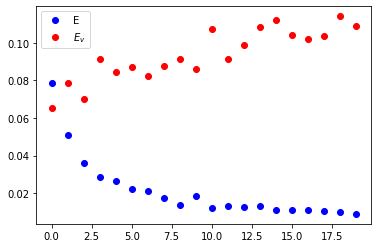

In [12]:
x = np.arange(0,len(loss))
plt.plot(x,loss,'bo',label='E')
plt.plot(x,val_loss,'ro',label='$E_v$')
plt.legend()

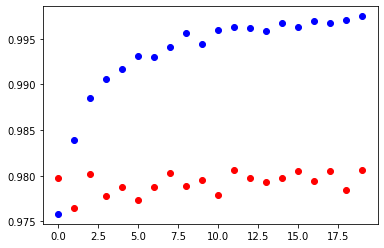

In [13]:
acc = val_dict['acc']
val_acc = val_dict['val_acc']
plt.plot(x,acc,'bo',label='Accuracy')
plt.plot(x,val_acc,'ro',label='A_v')

In [14]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
model.add(layers.Dropout(0.5))  
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dropout(0.5))  
model.add(layers.Dense(10, activation='softmax')) 
model.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

In [15]:
val2= model.fit(partial_X_train,partial_y_train,epochs=20, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/20
391/391 [==============================] - 13s 33ms/step - loss: 0.3778 - acc: 0.8836 - val_loss: 0.1393 - val_acc: 0.9580
Epoch 2/20
391/391 [==============================] - 11s 28ms/step - loss: 0.1681 - acc: 0.9485 - val_loss: 0.1062 - val_acc: 0.9698
Epoch 3/20
391/391 [==============================] - 8s 21ms/step - loss: 0.1310 - acc: 0.9603 - val_loss: 0.0910 - val_acc: 0.9726
Epoch 4/20
391/391 [==============================] - 8s 21ms/step - loss: 0.1075 - acc: 0.9672 - val_loss: 0.0849 - val_acc: 0.9754
Epoch 5/20
391/391 [==============================] - 8s 21ms/step - loss: 0.0953 - acc: 0.9694 - val_loss: 0.0753 - val_acc: 0.9775
Epoch 6/20
391/391 [==============================] - 8s 21ms/step - loss: 0.0863 - acc: 0.9726 - val_loss: 0.0766 - val_acc: 0.9774
Epoch 7/20
391/391 [==============================] - 8s 21ms/step - loss: 0.0798 - acc: 0.9757 - val_loss: 0.0812 - val_acc: 0.9773
Epoch 8/20
391/391 [==============================] - 8s 21ms/step 

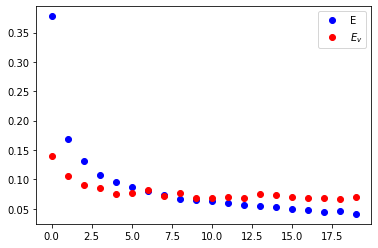

In [16]:
val_dict = val2.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']

x = np.arange(0,len(loss))
plt.plot(x,loss,'bo',label='E')
plt.plot(x,val_loss,'ro',label='$E_v$')
plt.legend()

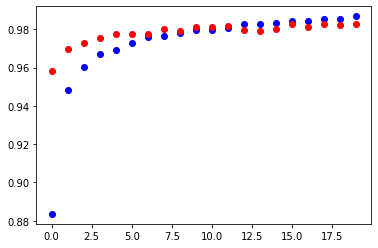

In [17]:
acc = val_dict['acc']
val_acc = val_dict['val_acc']
plt.plot(x,acc,'bo',label='Accuracy')
plt.plot(x,val_acc,'ro',label='A_v')

In [18]:
test_loss, test_acc = net.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1109 - acc: 0.9805


In [19]:
test_loss, test_acc = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0657 - acc: 0.9830
